# 데이터 전처리란?
- 텍스트 전처리는 풀고자 하는 문제의 용도에 맞게 텍스트를 사전에 처리하는 작업
- NLP에서 다루는 데이터는 "글자 그대로의 텍스트"인데 이 데이터에는 오타, 특수문자, 불필요한 정보가 많아서 사전에 처리가 필요
  - 예) "와~ 오늘 날씨 짱 좋다!!! 😆 http://weather.com" => "오늘 날씨 좋다"

## 전처리 과정 흐름
- 데이터 수집 → 정제/정규화 → 토큰화 → 불용어 제거 → 벡터화

1. 정제(Cleaning)
- 불필요한 문자(특수문자, 이모지, HTML 태그 등)를 제거

2. 정규화(Normalization)
- 같은 의미의 표현을 통일
    - 예: "짱" → "아주", "굿" → "좋다"  / 영어에서는 대소문자 통일(Hello vs hello)

3. 토큰화(Tokenization)
- 긴 텍스트(문장)을 의미 있는 작은 단위(단어, 형태소)로 나누는 것
  - 예) "자연어 처리는 재미있어요." → 토큰화 후: ['자연어', '처리', '는', '재미', '있', '어요']
- 영어: 공백으로 단어 구분이 명확, 한국어는 교착어 특성(조사, 어미가 있어) 영어보다 더 복잡함
  - 예) "사랑합니다" → "사랑" + "하" + "ㅂ니다" (어근+어미)
- 단어 단위 vs 문장 단위 토큰화

  3.1 어간 추출(Stemming)
  - 단어의 어미를 잘라내어 기본형으로 변환
    - 예) "running" → "run"
  - 규칙적이나 때때로 단어 의미 손실 가능

  3.2 표제어 추출(Lemmatization)
  - 단어 사전 기반으로 의미를 유지한 채 기본형 변환
    - 예) "better" → "good" , "The cats are running fast" → 표제어 추출: cat, run, fast , "공부했다", "공부합니다" → "공부하다"

4. 불용어(Stopwords)
- 자주 등장하지만 의미가 없는 단어, 즉 분석에 도움이 되지 않는 일반적인 단어들
  - 예) "은, 는, 이, 가, the, is, and"
  - 한국어 불용어 리스트
    - 조사: "은", "는", "이", "가", "을", "를", "에", "에서"
    - 어미: "다", "요", "니다", "습니다"
    - 부사: "매우", "정말", "아주", "너무"

# 1. 정제화

In [4]:
# 영문
import re

def quick_clean_english(text):
    """영어 텍스트 3단계 정제"""
    # 1. 소문자 + 특수문자 제거
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # 2. 공백 정리
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 3. 짧은 단어 제거
    words = [w for w in text.split() if len(w) >= 2]
    return ' '.join(words)

# 테스트
text = "Hello World!!! I'm learning NLP... Really interesting! 😊"
print(quick_clean_english(text))
# 결과: "hello world im learning nlp really interesting"

hello world im learning nlp really interesting


In [6]:
# 한글
import re
#from konlpy.tag import Okt

def quick_clean(text):
    """3단계 정제"""
    # 1. 특수문자 제거
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    # 2. 공백 정리  
    text = re.sub(r'\s+', ' ', text).strip()
    # 3. 짧은 단어 제거
    words = text.split()
    return ' '.join([w for w in words if len(w) >= 2])

# 테스트
text = "안녕하세요!!! 저는 NLP 공부중입니다 ㅋㅋㅋ"
print(quick_clean(text))  # "안녕하세요 저는 NLP 공부중입니다"

안녕하세요 저는 NLP 공부중입니다


# 2. 정규화
- re 모듈
  - [^...] → 부정 문자 클래스 (NOT, 제외)
  - 가-힣   → 한글 완성형 문자 범위
  - a-zA-Z → 영어 소문자 + 대문자
  - 0-9    → 숫자
  - \\s    → 공백 문자 (스페이스, 탭, 개행)
  - ''     → 빈 문자열로 치환 (제거)

In [ ]:
import re

def text_normalize(text):
    # 1. 소문자 변환
    text = text.lower()
    
    # 2. 특수문자 제거 (한글, 영문, 숫자, 공백만 유지)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    
    # 3. 여러 공백을 하나로
    text = re.sub(r'\s+', ' ', text)
    
    # 4. 앞뒤 공백 제거
    text = text.strip()
    
    return text

# 실습 데이터
messy_text = "   안녕하세요!!! 저는 NLP를 배우고 있습니다... 정말 흥미로워요 😊   "
cleaned_text = text_normalize(messy_text)

print(f"원본: '{messy_text}'")
print(f"정규화 후: '{cleaned_text}'")

# 3. Tokenization

참고 링크 : https://wikidocs.net/21698

주어진 텍스트에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 부릅니다. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다.  

일반적으로 토큰의 단위는 크게는 '문장' 작게는 '단어'라고 보시면 됩니다.

**토큰화는 일반적으로 여러분들이 직접 수행하시지 말고, 이미 구현되어져 있는 패키지에 의존하는 것이 훨씬 좋습니다.**

- https://platform.openai.com/tokenizer

---

## 3-1.Word Tokenization

단어 단위로 토큰화를 수행하는 것을 단어 토큰화(Word Tokenization)라고 합니다.

### 3-1-1. 영어 : Word Tokenization

영어로 토큰화를 할 때는 일반적으로 NLTK라는 패키지를 사용합니다. NTLK는 영어 자연어 처리를 위한 패키지라고 보시면 됩니다. 
NLTK에서는 다양한 영어 토크나이저(토큰화를 수행하는 도구)를 제공하고 있습니다.  
**토큰화 결과는 토크나이저마다 규칙이 조금씩 다릅니다. 어떤 토크나이저를 사용할 지 정답은 없습니다.**

어떤 토크나이저를 사용할 지는 사용자의 선택입니다.

In [1]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [

In [1]:
import nltk

- punkt (Punkt Sentence Tokenizer)
  > - 문장 단위로 텍스트를 나누는 도구
  > - 기계학습으로 훈련된 모델을 사용해 문장의 끝을 판단
  > - punkt는 영어에 특화되어 있어서 한국어보다 영어에서 더 정확합니다

- punkt_tab (PunktSentenceTokenizer - Tabbed version)
  > - punkt의 더 효율적인 버전
  > - 메모리 사용량이 적고 속도가 빠름

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')  # 추가 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cooju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cooju\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

아래의 문장을 보면 Don't와 Jone's에는 아포스트로피(')가 들어가있습니다.

In [2]:
sentence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

#### **NLTK의 토크나이저 1. word_tokenize**
- 가장 일반적이고 권장되는 토크나이저
- TreebankWordTokenizer를 기반으로 함
- 축약형, 구두점 등을 지능적으로 처리
- 대부분의 경우에 가장 좋은 결과

**아포스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화할 수 있을까요?**



In [3]:
from nltk.tokenize import word_tokenize  
print(word_tokenize(sentence))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


▲ Don't를 Do와 n't로 분리하였으며, Jone's는 Jone과 's로 분리

---

#### **NLTK의 토크나이저 2. WordPunctTokenizer**
- 가장 단순한 방식
- 알파벳/숫자 vs 구두점으로만 구분
- 빠르지만 정교하지 않음
- 특수한 경우 (축약형 등) 잘못 처리할 수 있음

In [23]:
from nltk.tokenize import WordPunctTokenizer  
tokenizer=WordPunctTokenizer()
print(tokenizer.tokenize(sentence))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


▲ Don't를 Don과 '와 t로 분리하였으며, Jone's를 Jone과 '와 s로 분리

---

 #### **NLTK의 토크나이저 3. TreebankWordTokenizer**
- Penn Treebank 프로젝트 스타일
- word_tokenize의 기반이 되는 토크나이저
- 언어학적으로 정확한 토큰화
- 축약형, 구두점을 세밀하게 분리

> Penn Treebank Tokenizer의 규칙        
    - 규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.  
    - 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.  

In [24]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
print(tokenizer.tokenize(sentence))

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


In [11]:
print(word_tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal', '.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


지금까지 주어진 문자열로부터 NLTK가 제공하는 토크나이저 3개를 사용하여 단어 토큰화를 수행해봤습니다.  

결과가 전부 다릅니다. **다시 말하지만 뭐가 더 좋은지 정답은 없습니다. 사실 토크나이저마다 각자 규칙이 다르기 때문에 사용하고자 하는 목적에 따라 토크나이저를 선택하는 것이 중요합니다.**

---

- **띄어쓰기를 기준으로 하는 단어 토큰화 (잘 되는 것 같아도 가급적 No!)**
- **사실 영어는 띄어쓰기를 기준으로 단어 토큰화를 한다고 하더라도 꽤 잘 되는 편입니다.**  
- 하지만 그럼에도 띄어쓰기를 기준으로 단어 토큰화를 하는 것은 하지 않는 것이 좋은데 그 이유를 이해해봅시다.

- 특수 문자가 있는 다음과 같은 영어 문장에 대해 word_tokenize() 와 split() 기능 비교하기

In [25]:
en_text = "A Dog Run back corner near spare bedrooms!!!!"

우선 앞서 배운 NLTK로 토큰화를 해봅시다.

In [26]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms', '!', '!', '!', '!']


이번에는 NLTK가 아닌 그냥 띄어쓰기 단위로 토큰화를 해봅시다.  
파이썬은 주어진 문자열에 .split()을 하면 띄어쓰기를 기준으로 전부 원소를 잘라서 리스트 형태로 리턴합니다.

In [27]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms!!!!']


보이시나요? 이게 바로 띄어쓰기를 기준으로 단어 토큰화를 수행한 결과입니다.  

사실 영어는 NLTK라는 패키지를 사용하면 좀 더 섬세한 토큰화를 하기는 하지만, 띄어쓰기를 하는 것만으로도 거의 토큰화가 잘 되는 편입니다. 하지만 그럼에도 띄어쓰기를 기준으로 하는 것을 지양(하지마세요)하라는 것은 이유가 있습니다.  

▲         
bedrooms와 ...가 붙어서 bedrooms...가 나오고,  
bedrooms와 !!!가 붙어서 bedrooms!!!가 나옵니다.  

파이썬이 보기에 이들은 전부 다른 단어로 인식합니다.
NLTK가 훨씬 섬세하게 동작한다는 것을 알 수 있습니다.

---

### 3-1-2. 한국어 : Word Tokenization(KoNLPy)

-  띄어쓰기를 기준으로 하는 단어 토큰화 (그냥 No!)      
    > 사실 영어의 경우에는 띄어쓰기 단위로 토큰화를 해도 단어들 간 구분이 꽤나 명확한 편입니다. 하지만 한국어의 경우에는 토큰화 작업이 훨씬 까다롭습니다. 그 이유는 **한국어는 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되는 경우가 너무 너무 너무 많기 때문입니다.**

- 한국어는 띄어쓰기로 토큰화하는 것은 명확한 실험 목적이 없다면 거의 쓰지 않는 것이 좋습니다. 예시를 통해서 이해해봅시다.

In [4]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


위의 예제에서는 '사과'란 단어가 총 4번 등장했는데  
모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다.

In [5]:
'사과' == '사과의' , '사과의' == '사과를' , '사과를' == '사과가' , '사과가' == '사과랑'

(False, False, False, False)

---

### 한국어 형태소 분석기

단어 토큰화를 위해서 영어에 NLTK가 있다면 한국어에는 형태소 분석기 패키지인 KoNLPy(코엔엘파이)가 존재합니다. 

- KoNLPy 의 다양한 형태소 분석, 태깅 파이썬 라이브러리 

> * Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
>   * http://semanticweb.kaist.ac.kr/hannanum/
> * Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
>   * http://kkma.snu.ac.kr/
> * Komoran: 코모란. Shineware에서 개발. 오탈자에 강함
>   * https://github.com/shin285/KOMORAN
> * Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.(windows에서 지원하나 설치가 원할하지 않음). 연산 속도가 빠르고 분석 성능도 준수하여 선호도가 높음
>   * https://bitbucket.org/eunjeon/mecab-ko
> * Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
>   * https://github.com/open-korean-text/open-korean-text
> 
> * Khaii 는 가장 퇴근에 나온 분석기로 딥러닝 기반 형태소 분석기 => Java 불필요! pip install kiwipiepy 
> * Soynlp는 학습 기반으로 복합 명사를 잘 추출해낼 수 있음

- 위 형태소 분석기들은 공통적으로 아래의 함수를 제공합니다.  
  - nouns : 명사 추출  
  - morphs : 형태소 추출  
  - pos : 품사 부착

- KoNLPy 설치하기
  - KoNLPy는 Java 기반 형태소 분석기를 사용하기 때문에 Java가 필수적으로 필요
  - Java 설치하기 :  설치 후 VSCode 다시 시작하기
    - Windows - Chocolatey 사용 (Powershell 관리자 권한)     
        choco install openjdk11

        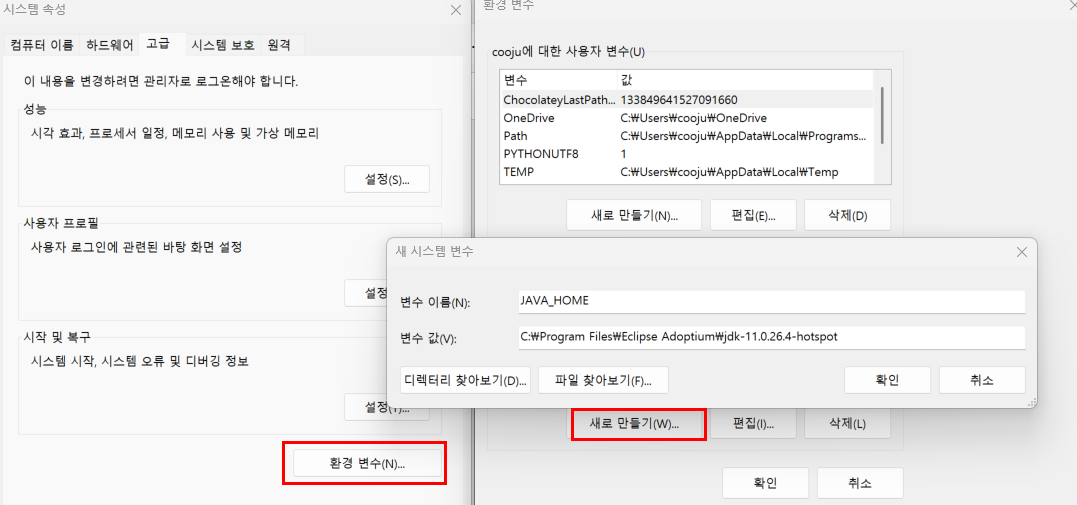

In [ ]:
!pip install konlpy

NLTK도 내부적으로 여러 토크나이저가 있던 것처럼 KoNLPy 또한 다양한 형태소 분석기를 가지고 있지만, Mecab이라는 형태소 분석기는 특이하게도 별도 설치를 해주어야 합니다.

In [19]:
# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

# Winodw - mecab
!pip install eunjeon

# Mac/Linux - mecab
#!pip install mecab-python3

     ---------------------------------------- 0.0/34.7 MB ? eta -:--:--
     ------- -------------------------------- 6.8/34.7 MB 35.0 MB/s eta 0:00:01
     ----------------- --------------------- 16.0/34.7 MB 40.3 MB/s eta 0:00:01
     -------------------------- ------------ 23.6/34.7 MB 39.3 MB/s eta 0:00:01
     ---------------------------------- ---- 30.4/34.7 MB 37.1 MB/s eta 0:00:01
     --------------------------------------- 34.7/34.7 MB 35.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for eunjeon: filename=eunjeon-0.4.0-cp310-cp310-win_amd64.whl size=35013292 sha256=65cdb8142a5a57a932dcc992e4c24027ba7a2f5cba3d92c6b3f983a9f93a4a18
  Stored in directory: c:\users\cooju\appdata\local\pip\cache\wheels\cf\67\b5\785cbf55e4a6ad20d3d6c0353cc39b3a275e87a3819c040241
Successfully built eunjeon


  DEPRECATION: Building 'eunjeon' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'eunjeon'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [1]:
from konlpy.tag import *
from eunjeon import Mecab

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

### 형태소 분석기 Okt
- nouns() - 명사만 추출
- morphs() - 형태소 분석
- pos() - 품사 태깅

In [3]:
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


'못'
망치로 못을 두드리다 => '못' : 명사  
나 그 일 못해요. => '못' : 부사

### 형태소 분석기 꼬꼬마

In [7]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


### 형태소 분석기 코모란

In [8]:
print(komoran.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(komoran.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(komoran.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코', '당신', '연휴', '여행']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '아', '보', '아요']
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('아', 'EC'), ('보', 'VX'), ('아요', 'EC')]


### 형태소 분석기 한나눔

In [9]:
print(hannanum.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(hannanum.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(hannanum.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에는', '여행', '을', '가', '아', '보', '아']
[('열심히', 'M'), ('코딩', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('당신', 'N'), (',', 'S'), ('연휴', 'N'), ('에는', 'J'), ('여행', 'N'), ('을', 'J'), ('가', 'P'), ('아', 'E'), ('보', 'P'), ('아', 'E')]


### 형태소 분석기 Mecab

In [10]:
print(mecab.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(mecab.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(mecab.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('한', 'XSA+ETM'), ('당신', 'NP'), (',', 'SC'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('봐요', 'EC+VX+EC')]


**각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에**, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 예를 들어서 속도를 중시한다면 메캅을 사용할 수 있습니다.



참고 : https://iostream.tistory.com/144 (형태소 분석기 성능 비교)

# 3-2. Sentence Tokenization

문장 토큰화는 단어 토큰화와는 달리 주어진 텍스트를 문장 단위로 나눌 경우에 사용합니다.

### 3-2-1. 영어 : Sentence Tokenization (NLTK)

여러분들이 문자열이 주어졌을 때, 문장 단위로 나눈다고 가정해보세요.

Yonsei University is a private research university in Seoul, South Korea. Yonsei University is deemed as one of the three most prestigious institutions in the country. It is particularly respected in the studies of medicine and business administration.

In [11]:
temp = 'Yonsei University is a private research university in Seoul, South Korea. Yonsei University is deemed as one of the three most prestigious institutions in the country. It is particularly respected in the studies of medicine and business administration.'

문자열.split('자르는 기준')을 사용하면 해당 기준으로 문자열들을 분리하여 리스트 형태로 반환합니다.  
아래의 코드는 온점을 기준으로 문자열을 자르는 코드입니다.

In [12]:
temp.split('. ')

['Yonsei University is a private research university in Seoul, South Korea',
 'Yonsei University is deemed as one of the three most prestigious institutions in the country',
 'It is particularly respected in the studies of medicine and business administration.']

직관적으로 생각해봤을 때는 ?나 온점(.)이나 ! 기준으로 문장을 잘라내면 되지 않을까라고 생각할 수 있지만, 꼭 그렇지만은 않습니다. !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 온점은 꼭 그렇지 않기 때문입니다. 다시 말해, 온점은 문장의 끝이 아니더라도 등장할 수 있습니다.

**IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘. 그러고나서 점심 먹으러 가자.**  
**Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.**

온점을 기준으로 문장을 구분할 경우에는 예외사항이 너무 많습니다.  
**NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원하고 있습니다. **

In [13]:
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mae sure no one was near."

In [14]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to mae sure no one was near.']


In [15]:
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [16]:
text="IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘. 그러고나서 점심 먹으러 가자."
print(sent_tokenize(text))

['IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 ukairia777@gmail.com로 결과 좀 보내줘.', '그러고나서 점심 먹으러 가자.']


### 3-2-2. 한국어 : Sentence Tokenization(KSS)
KSS란?
- 한국어 문장 분리에 특화된 라이브러리
- NLTK의 sent_tokenize보다 한국어에 정확
- 복잡한 한국어 문장 구조를 이해

In [17]:
!pip install kss

     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     ---------------------------------------- 0.3/26.4 MB ? eta -:--:--
     ----- ---------------------------------- 3.9/26.4 MB 14.7 MB/s eta 0:00:02
     ----------------- --------------------- 11.8/26.4 MB 23.8 MB/s eta 0:00:01
     --------------------------- ----------- 18.6/26.4 MB 26.7 MB/s eta 0:00:01
     --------------------------------------  26.2/26.4 MB 29.7 MB/s eta 0:00:01
     --------------------------------------- 26.4/26.4 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cache

  DEPRECATION: Building 'distance' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'distance'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'pecab' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pecab'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'tossi' using the legacy setup.py bdist_wheel mechanism, which

In [ ]:
# 경고 메시지 숨기기 (가장 간단)
# import warnings
# warnings.filterwarnings('ignore')

import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 이제 해보면 알걸요?']
